In [47]:
# Install the fitparse library to enable parsing of .fit files
%pip install fitparse

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [48]:
# Import common libraries and fitparse
import pandas as pd
import numpy as np
import datetime as dt
from fitparse import FitFile
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
bike_p1 = pd.read_csv("aerobic_recovery.csv")

In [51]:
bike_p1.head()

,session,accumulated_power,activity_type,cadence,distance,enhanced_speed,heart_rate,power,speed,timestamp,date
0,Session_2023-12-05,139.0,cycling,74.0,3.58,3.583,90,139.0,3.583,2023-12-05 12:30:35,2023-12-05
1,Session_2023-12-05,268.0,cycling,78.0,7.50,3.917,91,129.0,3.917,2023-12-05 12:30:36,2023-12-05
2,Session_2023-12-05,377.0,cycling,80.0,11.72,4.222,93,109.0,4.222,2023-12-05 12:30:37,2023-12-05
3,Session_2023-12-05,468.0,cycling,84.0,16.25,4.528,93,91.0,4.528,2023-12-05 12:30:38,2023-12-05
4,Session_2023-12-05,558.0,cycling,88.0,21.08,4.833,95,90.0,4.833,2023-12-05 12:30:39,2023-12-05


I am not happy with the labels in the 'session' column' and want to map names to those which are easier to type. I create a new column named 'name' and (for some reason) I elected to populate it using a function. Later I use a dictionary to populate another column using a more basic and cleaner method.

In [52]:
def new_name(session):
    if session == 'Session_2023-12-05':
        return 'Session_1'
    elif session == 'Session_2024-12-08':
        return 'Session_2'
    elif session == 'Session_2024-12-19':
        return 'Session_3'
    elif session == 'Session_2025-01-06':
        return 'Session_4'
    elif session == 'Session_2025-01-28':
        return 'Session_5'
    else:
        return 'Session_6'

bike_p1['name'] = bike_p1['session'].map(new_name)

In [53]:
bike_p1.head()

,session,accumulated_power,activity_type,cadence,distance,enhanced_speed,heart_rate,power,speed,timestamp,date,name
0,Session_2023-12-05,139.0,cycling,74.0,3.58,3.583,90,139.0,3.583,2023-12-05 12:30:35,2023-12-05,Session_1
1,Session_2023-12-05,268.0,cycling,78.0,7.50,3.917,91,129.0,3.917,2023-12-05 12:30:36,2023-12-05,Session_1
2,Session_2023-12-05,377.0,cycling,80.0,11.72,4.222,93,109.0,4.222,2023-12-05 12:30:37,2023-12-05,Session_1
3,Session_2023-12-05,468.0,cycling,84.0,16.25,4.528,93,91.0,4.528,2023-12-05 12:30:38,2023-12-05,Session_1
4,Session_2023-12-05,558.0,cycling,88.0,21.08,4.833,95,90.0,4.833,2023-12-05 12:30:39,2023-12-05,Session_1


In [54]:
bike_p1 = bike_p1[['name', 'session', 'accumulated_power', 'activity_type', 'cadence', 'distance','enhanced_speed', 'heart_rate', 'power', 'speed', 'timestamp', 'date']]

In [55]:
bike_p1.head()

,name,session,accumulated_power,activity_type,cadence,distance,enhanced_speed,heart_rate,power,speed,timestamp,date
0,Session_1,Session_2023-12-05,139.0,cycling,74.0,3.58,3.583,90,139.0,3.583,2023-12-05 12:30:35,2023-12-05
1,Session_1,Session_2023-12-05,268.0,cycling,78.0,7.50,3.917,91,129.0,3.917,2023-12-05 12:30:36,2023-12-05
2,Session_1,Session_2023-12-05,377.0,cycling,80.0,11.72,4.222,93,109.0,4.222,2023-12-05 12:30:37,2023-12-05
3,Session_1,Session_2023-12-05,468.0,cycling,84.0,16.25,4.528,93,91.0,4.528,2023-12-05 12:30:38,2023-12-05
4,Session_1,Session_2023-12-05,558.0,cycling,88.0,21.08,4.833,95,90.0,4.833,2023-12-05 12:30:39,2023-12-05


create a dictionary with my ftp at them time of each session. then use it to populate a column named 'ftp'

In [56]:
ftp_map = {
    'Session_1': '227',
    'Session_2': '252',
    'Session_3': '252',
    'Session_4': '264',
    'Session_5': '258',
    'Session_6': '266'
}

bike_p1['ftp'] = bike_p1['name'].map(ftp_map)

In [57]:
bike_p1.dtypes

name                  object
session               object
accumulated_power    float64
activity_type         object
cadence              float64
distance             float64
enhanced_speed       float64
heart_rate             int64
power                float64
speed                float64
timestamp             object
date                  object
ftp                   object
dtype: object

In [58]:
bike_p1['ftp'] = bike_p1['ftp'].astype(int)

In [59]:
bike_p1.dtypes

name                  object
session               object
accumulated_power    float64
activity_type         object
cadence              float64
distance             float64
enhanced_speed       float64
heart_rate             int64
power                float64
speed                float64
timestamp             object
date                  object
ftp                    int64
dtype: object

In [60]:
bike_p1.head()

,name,session,accumulated_power,activity_type,cadence,distance,enhanced_speed,heart_rate,power,speed,timestamp,date,ftp
0,Session_1,Session_2023-12-05,139.0,cycling,74.0,3.58,3.583,90,139.0,3.583,2023-12-05 12:30:35,2023-12-05,227
1,Session_1,Session_2023-12-05,268.0,cycling,78.0,7.50,3.917,91,129.0,3.917,2023-12-05 12:30:36,2023-12-05,227
2,Session_1,Session_2023-12-05,377.0,cycling,80.0,11.72,4.222,93,109.0,4.222,2023-12-05 12:30:37,2023-12-05,227
3,Session_1,Session_2023-12-05,468.0,cycling,84.0,16.25,4.528,93,91.0,4.528,2023-12-05 12:30:38,2023-12-05,227
4,Session_1,Session_2023-12-05,558.0,cycling,88.0,21.08,4.833,95,90.0,4.833,2023-12-05 12:30:39,2023-12-05,227


In [64]:
bike_p1.to_csv('aerobic_recovery_v2.csv', index=False)

In [61]:
averages = bike_p1.groupby('name', as_index=True)[['cadence', 'heart_rate', 'power', 'ftp']].mean()

In [45]:
averages.head()

,cadence,heart_rate,power,ftp
name,,,,
Session_1,87.564843,108.665926,121.745626,227.0
Session_2,90.254374,102.692585,133.852541,252.0
Session_3,86.687031,98.876146,133.762566,252.0
Session_4,88.643710,106.128575,135.951125,264.0
Session_5,94.910303,108.768398,137.153013,258.0


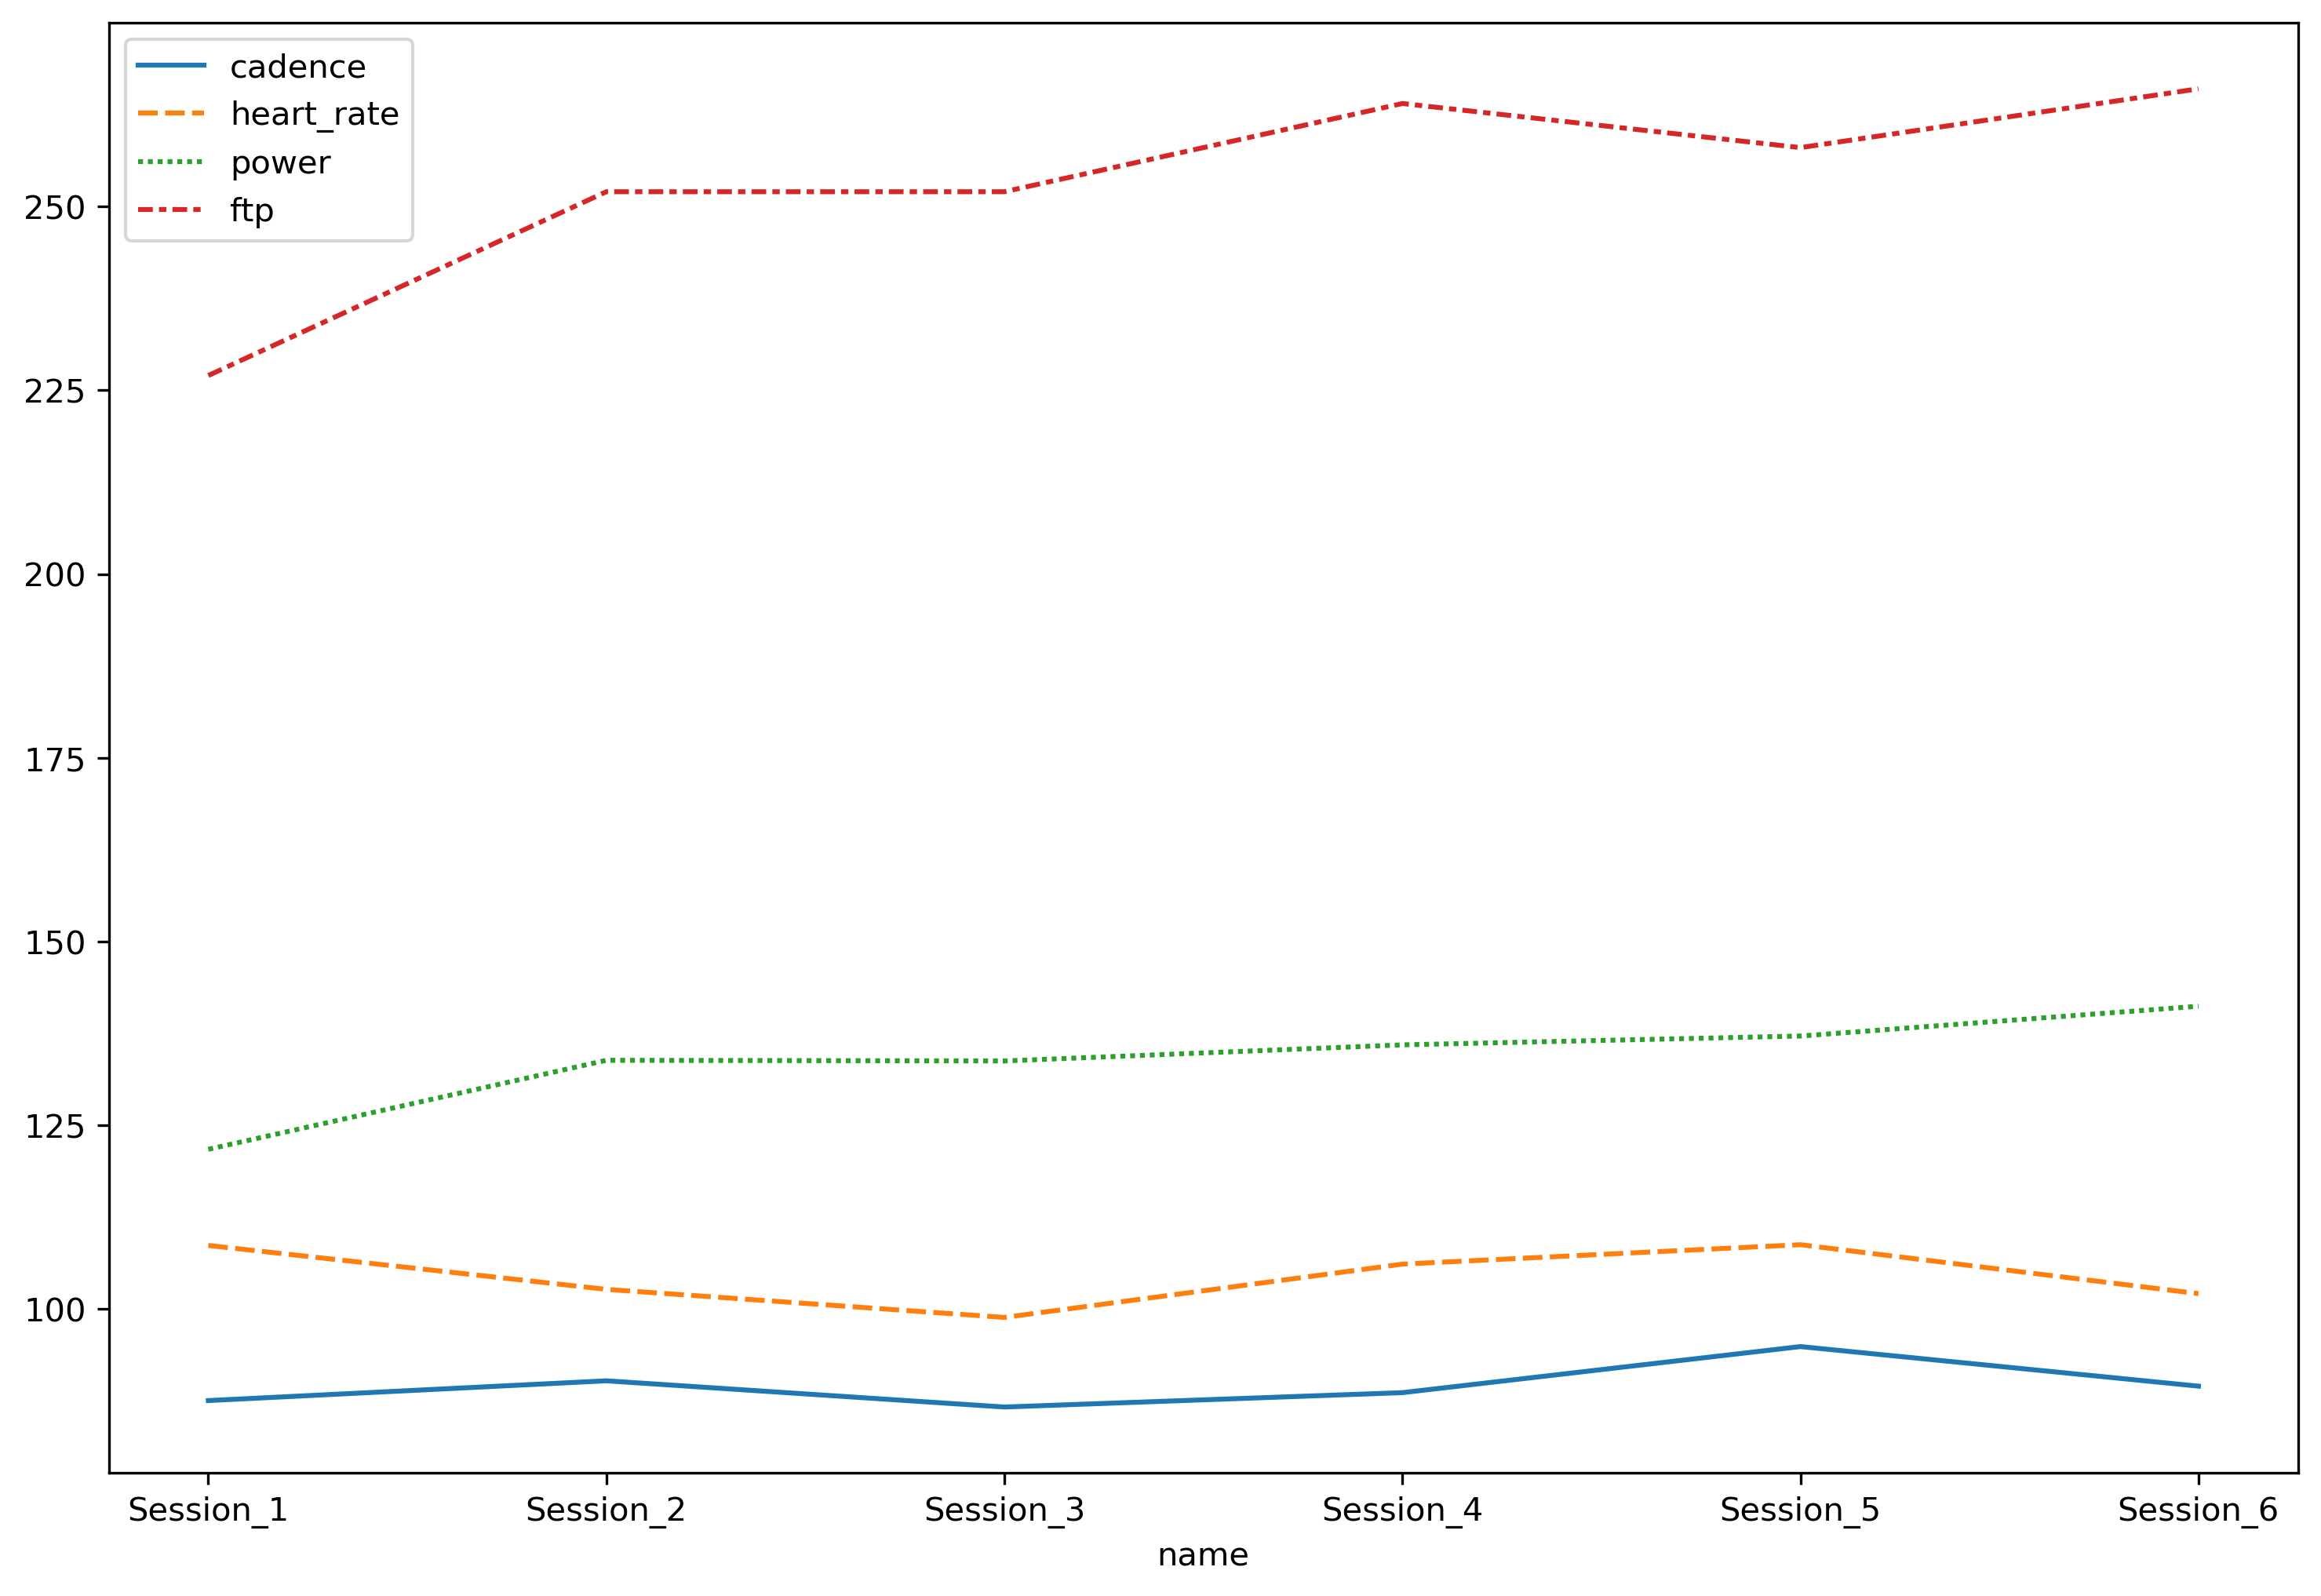

In [65]:
plt.figure(figsize=(12,8), dpi=300)
sns.lineplot(data=averages[['cadence', 'heart_rate', 'power', 'ftp']])
plt.savefig('chart.png',dpi=300, bbox_inches='tight')
plt.show()